In [39]:
### Read Mp4 video file to print out meta and frame count
from torchvision.io import read_video
import av
import os

video_path = os.path.join("Nov24", "walking.mp4")
video, audio, meta = read_video(video_path, pts_unit="sec", output_format="TCHW")
fps = meta['video_fps']
frame_counts = len(video)

print(fps, frame_counts)

29.88291588955274 162


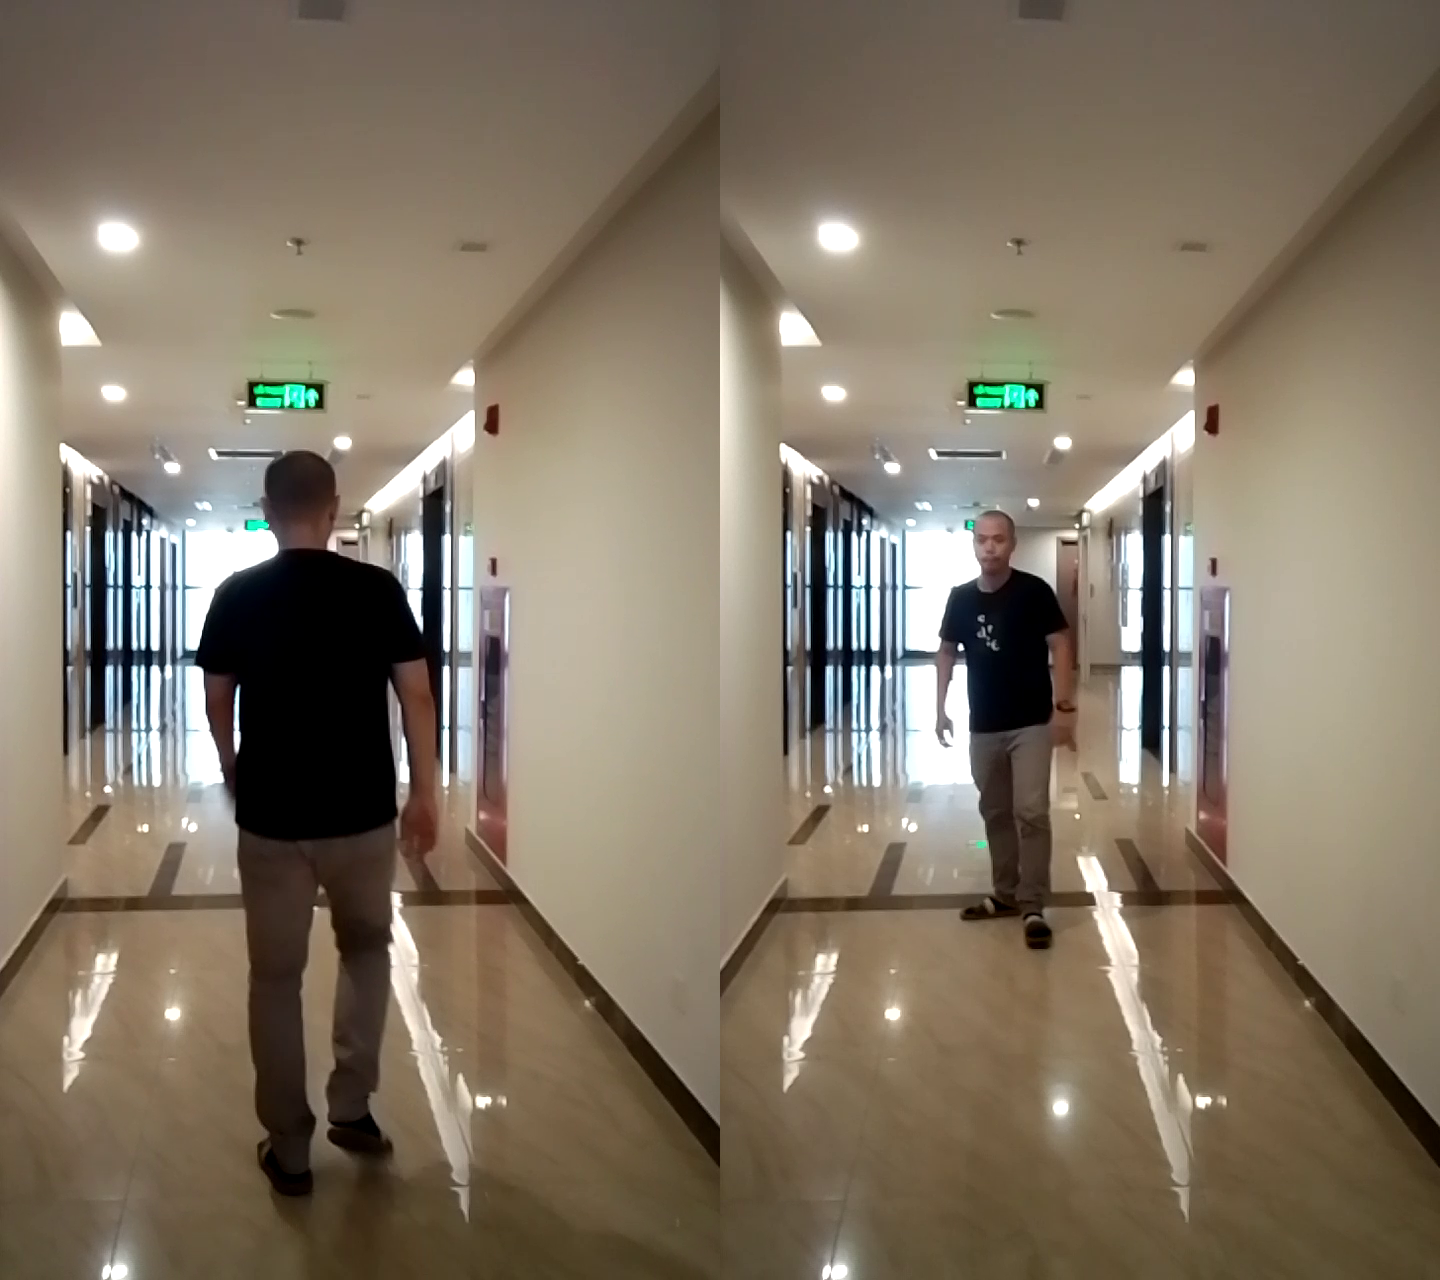

In [42]:
from torchvision.transforms.functional import to_pil_image
from PIL import Image

### Stiching 2 Frame Togethers
def stitch(frame01, frame02):

    # Split Video Frames to Left and Right Image
    left_image = to_pil_image(frame01)
    right_image = to_pil_image(frame02)

    # Create the Extended Video Frame
    width = left_image.width
    height = left_image.height + right_image.height
    new_frame = Image.new("RGB", (width, height))

    # Paste Two Frame into one Larger Frame
    new_frame.paste(im=left_image, box=(0,0))
    new_frame.paste(im=right_image, box=(0, left_image.height))
    new_frame = new_frame.rotate(90, expand=True)
    return new_frame

result = stitch(video[0], video[80])
result

In [47]:
### Generate New Video from Frames

### Create an empty mp4 video container 
container = av.open("new.mp4", mode="w")

### Add mp4 stream to container with fps, width and height
stream = container.add_stream("mpeg4", rate=math.floor(fps))
stream.width = result.width
stream.height = result.height

### Write Encode function to Encode frame into Mpeg4 format
def encode(image):
    frame = av.VideoFrame.from_image(image)
    for packet in stream.encode(frame):
        container.mux(packet)

### Iterate over Video Frames and Merge them
new_counts = math.floor(frame_counts/2)

for idx in range(new_counts):
   
    ### Select left and right frame
    left_frame = video[idx]
    right_frame = video[idx+new_counts]
      
    ### Generate Stitch Frame
    stitched_frame = stitch(left_frame, right_frame)
    
    ### Encode frames into Mp4
    encode(stitched_frame)
    
    ### Use Overwrite Print to Display Current Progress
    print(f"Processing {idx+1} of {new_counts} ", end="\r")
    
### Close Container
container.close()
